In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas

%matplotlib inline

In [10]:
adjs = np.load('../data/dilated_connection_matrix.npy')

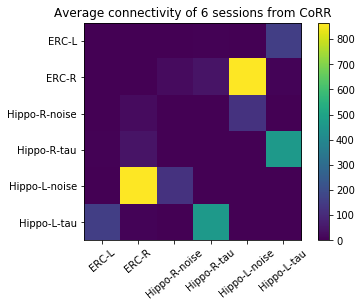

In [8]:
plt.imshow(np.mean(adjs, axis=2))
labs = ['ERC-L', 'ERC-R',
        'Hippo-R-noise', 'Hippo-R-tau',
        'Hippo-L-noise', 'Hippo-L-tau']
plt.xticks(np.arange(0, 6), labs, rotation=40)
plt.yticks(np.arange(0, 6), labs)
plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
plt.colorbar()
plt.show()

In [7]:
avg = np.mean(adjs, axis=2)
avg2 = np.asarray((avg[1:3,:], avg[0,:], avg[3:,:]))
avg[1:3,:]
# plt.imshow(np.log(avg+1))
# labs = ['ERC-R', 'Hippo-R-noise', 'Hippo-R-tau',
#         'ERC-L', 'Hippo-L-noise', 'Hippo-L-tau']
# plt.xticks(np.arange(0, 6), labs, rotation=40)
# plt.yticks(np.arange(0, 6), labs)
# plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
# plt.colorbar()
# plt.show()

array([[  1.22807018e-01,   0.00000000e+00,   2.65614035e+01,
          4.51140351e+01,   8.64210526e+02,   7.41228070e+00],
       [  0.00000000e+00,   2.65614035e+01,   0.00000000e+00,
          1.75438596e-02,   1.27710526e+02,   3.50877193e-02]])

## Unweighted Analysis

In [13]:
lhs = stats.ttest_ind(adjs[0,1,:], adjs[0,2,:])
rhs = stats.ttest_ind(adjs[3,4,:], adjs[3,5,:])
print("Left: {}".format(lhs))
print("Right: {}".format(rhs))

Left: Ttest_indResult(statistic=14.88414744997182, pvalue=8.540326043695926e-44)
Right: Ttest_indResult(statistic=-18.576482462264657, pvalue=4.7578445685085678e-63)


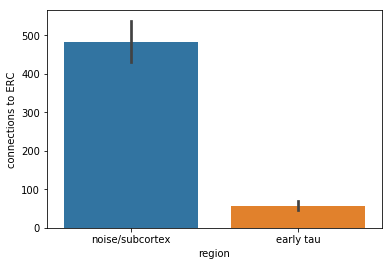

In [16]:
jnk_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,1,:]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,2,:]
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_lhs)

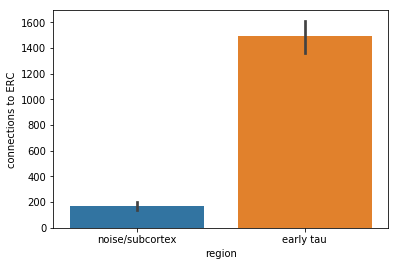

In [17]:
jnk_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[3,4,:]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[3,5,:]
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_rhs)

## Weighted Analysis (Sizes)

In [24]:
hippo_size_lhs = np.load('../data/cho_hippo_left_sizes.npy')
hippo_size_rhs = np.load('../data/cho_hippo_right_sizes.npy')

In [23]:
size_lhs = stats.ttest_ind(adjs[0,1,:]/hippo_size_lhs[0], adjs[0,2,:]/hippo_size_lhs[1])
size_rhs = stats.ttest_ind(adjs[3,4,:]/hippo_size_rhs[0], adjs[3,5,:]/hippo_size_rhs[1])
print("Left: {}".format(size_lhs))
print("Right: {}".format(size_rhs))

Left: Ttest_indResult(statistic=14.894053902824826, pvalue=7.6291116336633622e-44)
Right: Ttest_indResult(statistic=-20.43914353269745, pvalue=2.4612034120738237e-73)


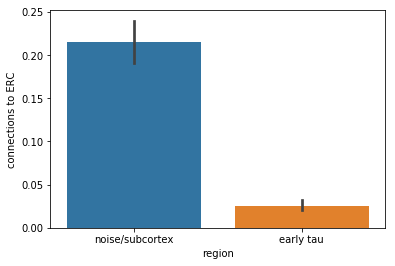

In [26]:
jnk_size_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,1,:]/hippo_size_lhs[0]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,2,:]/hippo_size_lhs[1]
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_size_lhs)

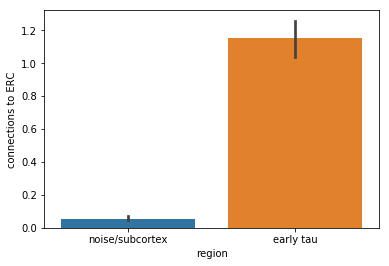

In [27]:
jnk_size_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[3,4,:]/hippo_size_rhs[0]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[3,5,:]/hippo_size_rhs[1]
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_size_rhs)

## Weighted Analysis (Distance)

In [28]:
hippo_dist_lhs = np.load('../data/cho_hippo_left_distances.npy')
hippo_dist_rhs = np.load('../data/cho_hippo_right_distances.npy')

In [29]:
dist_lhs = stats.ttest_ind(adjs[0,1,:]/hippo_dist_lhs[0], adjs[0,2,:]/hippo_dist_lhs[1])
dist_rhs = stats.ttest_ind(adjs[3,4,:]/hippo_dist_rhs[0], adjs[3,5,:]/hippo_dist_rhs[1])
print("Left: {}".format(dist_lhs))
print("Right: {}".format(dist_rhs))

Left: Ttest_indResult(statistic=12.691571798178925, pvalue=2.1157455858955488e-33)
Right: Ttest_indResult(statistic=-20.185148381158623, pvalue=6.4593447277358187e-72)


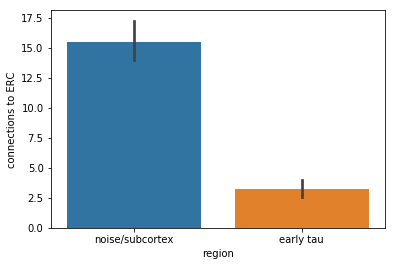

In [30]:
jnk_dist_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[0,1,:]/hippo_dist_lhs[0]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[0,2,:]/hippo_dist_lhs[1]
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_dist_lhs)

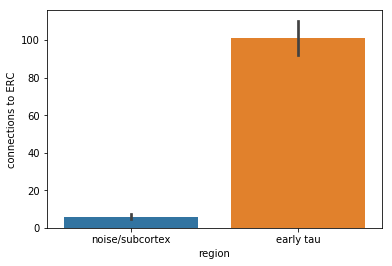

In [31]:
jnk_dist_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to ERC','region'])
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'connections to ERC'] = adjs[3,4,:]/hippo_dist_rhs[0]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'connections to ERC'] = adjs[3,5,:]/hippo_dist_rhs[1]
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to ERC',data=jnk_dist_rhs)

# Redoing analysis with transentorhinal cortex data only

In [3]:
adjs = np.load('../data/connection_matrix_TRANSec.npy')

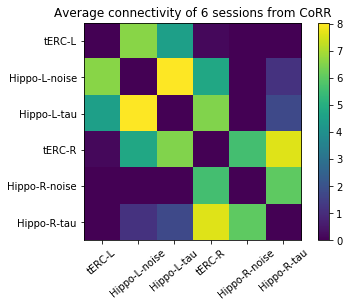

In [13]:
plt.imshow(np.log(np.mean(adjs, axis=2)+1))
labs = ['tERC-L', 'Hippo-L-noise', 'Hippo-L-tau',
        'tERC-R', 'Hippo-R-noise', 'Hippo-R-tau']
plt.xticks(np.arange(0, 6), labs, rotation=40)
plt.yticks(np.arange(0, 6), labs)
plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
plt.colorbar()
plt.show()

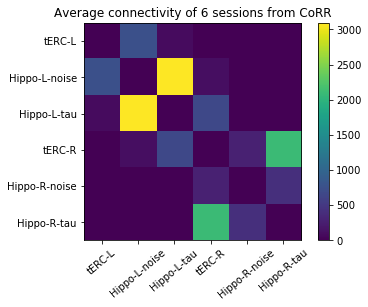

In [14]:
plt.imshow(np.mean(adjs, axis=2))
labs = ['tERC-L', 'Hippo-L-noise', 'Hippo-L-tau',
        'tERC-R', 'Hippo-R-noise', 'Hippo-R-tau']
plt.xticks(np.arange(0, 6), labs, rotation=40)
plt.yticks(np.arange(0, 6), labs)
plt.title('Average connectivity of {} sessions from CoRR'.format(len(adjs)))
plt.colorbar()
plt.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/ERC_connx.pdf')
plt.show()

## Unweighted Analysis

In [79]:
lhs_t,lhs_p = stats.ttest_ind(adjs[0,1,:], adjs[0,2,:])
rhs_t,rhs_p = stats.ttest_ind(adjs[3,4,:], adjs[3,5,:])
print("Left: {}".format(lhs_t,lhs_p))
print("Right: {}".format(rhs_t,lhs_p))

Left: 15.257639512785625
Right: -17.799825679836772


//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


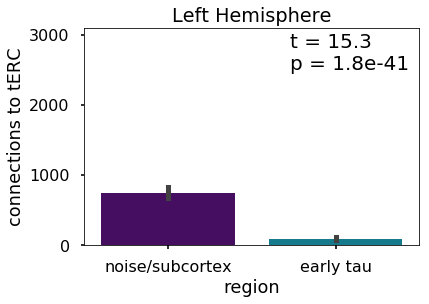

In [90]:
sns.set_context('poster')
jnk_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[0,1,:]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[0,2,:]
jnk_lhs.loc[jnk_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_lhs.loc[jnk_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_lhs,palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Left Hemisphere')
plt.ylim(0,3100)
plt.text(.73, 2500,'t = %s\np = %s'%(float('%.3g' % lhs_t),float('%.2g' % lhs_p)), fontsize=20)
plt.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/CNXLeftHemisphere.pdf')

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


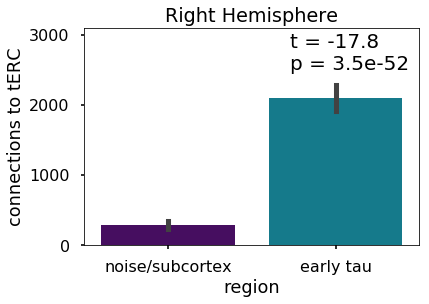

In [89]:
jnk_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[3,4,:]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[3,5,:]
jnk_rhs.loc[jnk_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_rhs.loc[jnk_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_rhs,palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Right Hemisphere')
plt.ylim(0,3100)
plt.text(.73, 2500,'t = %s\np = %s'%(float('%.3g' % rhs_t),float('%.2g' % rhs_p)), fontsize=20)
plt.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/CnxRightHemisphere.pdf')

## Weighted Analysis (Sizes)

In [26]:
hippo_size_lhs = np.load('../data/cho_hippo_left_sizes.npy')
hippo_size_rhs = np.load('../data/cho_hippo_right_sizes.npy')

In [27]:
size_lhs = stats.ttest_ind(adjs[0,1,:]/hippo_size_lhs[0], adjs[0,2,:]/hippo_size_lhs[1])
size_rhs = stats.ttest_ind(adjs[3,4,:]/hippo_size_rhs[0], adjs[3,5,:]/hippo_size_rhs[1])
print("Left: {}".format(size_lhs))
print("Right: {}".format(size_rhs))

Left: Ttest_indResult(statistic=15.269132239038166, pvalue=1.6362380501101058e-41)
Right: Ttest_indResult(statistic=-20.034992373755561, pvalue=9.9802587178877546e-62)


//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


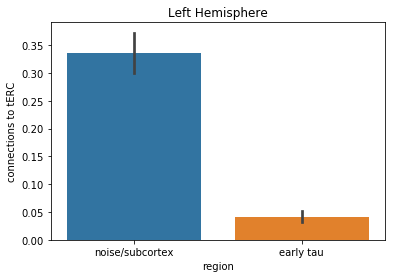

In [28]:
jnk_size_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[0,1,:]/hippo_size_lhs[0]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[0,2,:]/hippo_size_lhs[1]
jnk_size_lhs.loc[jnk_size_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_lhs.loc[jnk_size_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_size_lhs)
plt.title('Left Hemisphere')

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


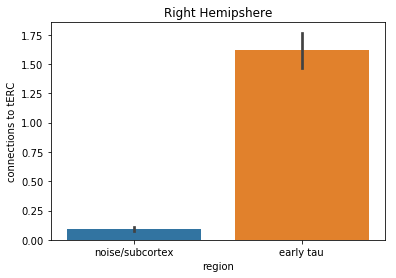

In [29]:
jnk_size_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[3,4,:]/hippo_size_rhs[0]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[3,5,:]/hippo_size_rhs[1]
jnk_size_rhs.loc[jnk_size_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_size_rhs.loc[jnk_size_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_size_rhs)
plt.title('Right Hemipshere')

## Weighted Analysis (Distance)

In [10]:
hippo_dist_lhs = np.load('../data/cho_hippo_left_distances.npy')
hippo_dist_rhs = np.load('../data/cho_hippo_right_distances.npy')

In [11]:
dist_lhs = stats.ttest_ind(adjs[0,1,:]/hippo_dist_lhs[0], adjs[0,2,:]/hippo_dist_lhs[1])
dist_rhs = stats.ttest_ind(adjs[3,4,:]/hippo_dist_rhs[0], adjs[3,5,:]/hippo_dist_rhs[1])
print("Left: {}".format(dist_lhs))
print("Right: {}".format(dist_rhs))

Left: Ttest_indResult(statistic=12.726587815013787, pvalue=3.1790608045292061e-31)
Right: Ttest_indResult(statistic=-19.729931197667661, pvalue=2.0126490124172445e-60)


//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


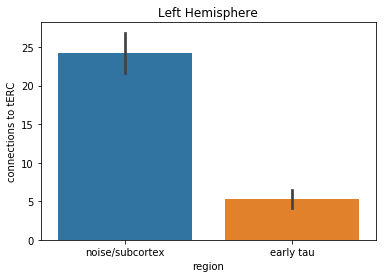

In [13]:
jnk_dist_lhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[0,1,:]/hippo_dist_lhs[0]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[0,2,:]/hippo_dist_lhs[1]
jnk_dist_lhs.loc[jnk_dist_lhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_lhs.loc[jnk_dist_lhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_dist_lhs)
plt.title('Left Hemisphere')

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


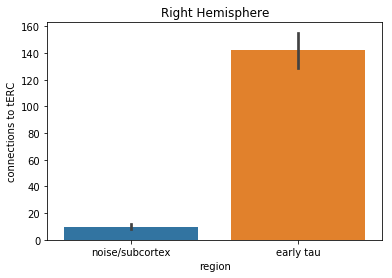

In [17]:
jnk_dist_rhs = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'connections to tERC'] = adjs[3,4,:]/hippo_dist_rhs[0]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'connections to tERC'] = adjs[3,5,:]/hippo_dist_rhs[1]
jnk_dist_rhs.loc[jnk_dist_rhs.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_dist_rhs.loc[jnk_dist_rhs.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_dist_rhs)
plt.title('Right Hemisphere')

## Weighted by distance *and* size

In [32]:
dist_sz_lhs = stats.ttest_ind((adjs[0,1,:]/hippo_dist_lhs[0]/hippo_size_lhs[0]), 
                            (adjs[0,2,:]/hippo_dist_lhs[1]/hippo_size_lhs[1]))
dist_sz_rhs = stats.ttest_ind((adjs[3,4,:]/hippo_dist_rhs[0]/hippo_size_rhs[0]), 
                            (adjs[3,5,:]/hippo_dist_rhs[1]/hippo_size_rhs[1]))
print("Left: {}".format(dist_sz_lhs))
print("Right: {}".format(dist_sz_rhs))

Left: Ttest_indResult(statistic=12.747780413238925, pvalue=2.6257851659239671e-31)
Right: Ttest_indResult(statistic=-20.756632086892211, pvalue=8.2303198862414624e-65)


In [41]:
sns.barplot?

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


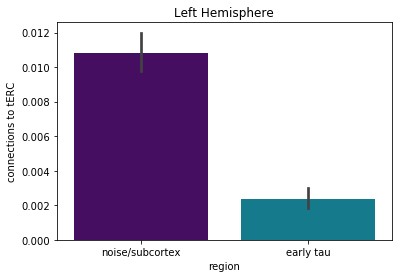

In [54]:
jnk_l = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_l.loc[jnk_l.index[:adjs.shape[2]],'connections to tERC'] = (adjs[0,1,:]/hippo_dist_lhs[0]/hippo_size_lhs[0])
jnk_l.loc[jnk_l.index[adjs.shape[2]]:,'connections to tERC'] = (adjs[0,2,:]/hippo_dist_lhs[1]/hippo_size_lhs[1])
jnk_l.loc[jnk_l.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_l.loc[jnk_l.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_l, palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Left Hemisphere')

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


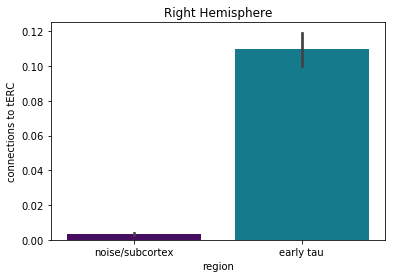

In [55]:
jnk_r = pandas.DataFrame(index=range(adjs.shape[2]*2),columns = ['connections to tERC','region'])
jnk_r.loc[jnk_r.index[:adjs.shape[2]],'connections to tERC'] = (adjs[3,4,:]/hippo_dist_rhs[0]/hippo_size_rhs[0])
jnk_r.loc[jnk_r.index[adjs.shape[2]]:,'connections to tERC'] = (adjs[3,5,:]/hippo_dist_rhs[1]/hippo_size_rhs[1])
jnk_r.loc[jnk_r.index[:adjs.shape[2]],'region'] = ['noise/subcortex'] * adjs.shape[2]
jnk_r.loc[jnk_r.index[adjs.shape[2]]:,'region'] = ['early tau'] * adjs.shape[2]

sns.barplot(x='region',y='connections to tERC',data=jnk_r,palette=[sns.xkcd_rgb["royal purple"],
                                                                    sns.xkcd_rgb["teal blue"]])
plt.title('Right Hemisphere')